In [81]:
import numpy as np
import pandas as pd
import datetime
import decimal
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
Data = pd.read_csv('./covid19_de_tuebingen.csv', sep = ';')
Data['day'] = pd.to_datetime(Data['date']).dt.to_period('D')
#Data.tail()


,date,T,totalcase,totaldeath,totalM,totalF,AR1,AR2,AR3,AR4,AR5,AR6,day
19,'2020-03-15',20,64,0,33,29,2,27,22,2,3,0,2020-03-15
20,'2020-03-16',21,75,0,40,33,2,28,28,4,5,1,2020-03-16
21,'2020-03-17',22,91,0,50,39,2,32,36,7,6,2,2020-03-17
22,'2020-03-18',23,99,0,53,44,2,34,36,11,8,4,2020-03-18
23,'2020-03-19',24,114,0,60,52,3,38,44,12,9,5,2020-03-19


In [127]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

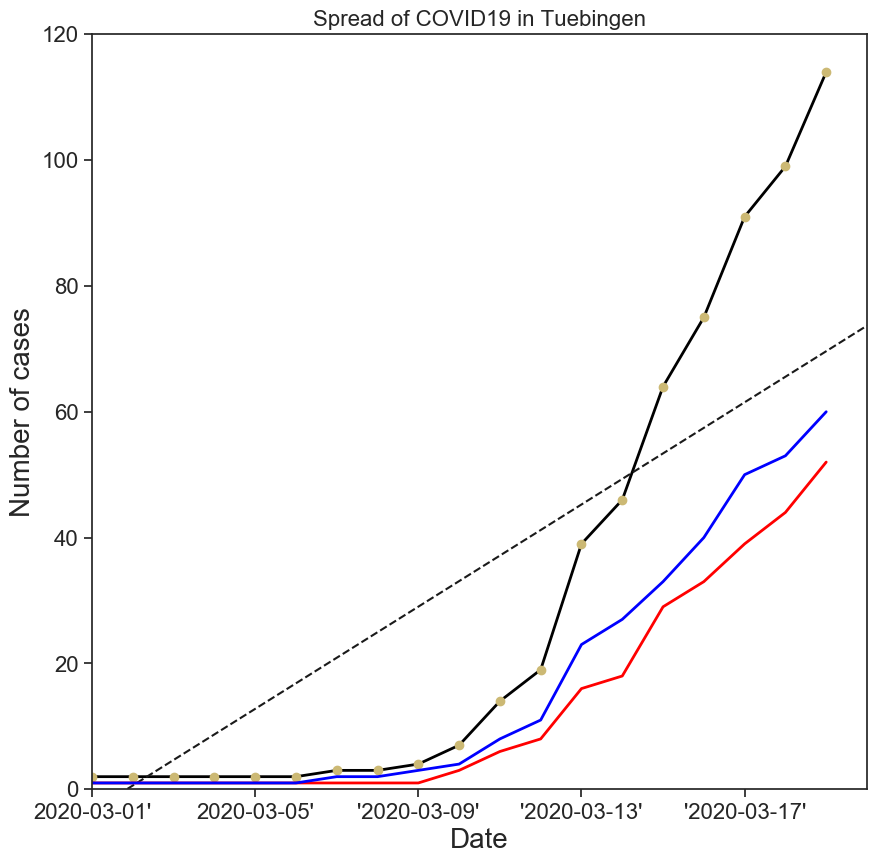

In [128]:

y = np.linspace(0, 24, 24)
coef = np.polyfit(y,Data.totalcase,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
fig, ax = plt.subplots(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
ax.plot(Data.date, Data.totalcase, label="diagnosed", color='black', linewidth=2)
ax.plot(Data.date,Data.totalcase, 'yo', y, poly1d_fn(y), '--k')
ax.plot(Data.date, Data.totalF, label="women", color='red', linewidth=2)
ax.plot(Data.date, Data.totalM, label="men", color='blue' , linewidth=2)
ax.set_ylabel('Number of cases')
plt.ylim(0, 120)
plt.xlim(5, 24)

ax.set_xlabel('Date')
ax.set_xticks(np.arange(5, 25, step=4))
ax.set_title('Spread of COVID19 in Tuebingen')
#save the figure 
plt.savefig('COVID19_DE_Tuebingen.png')
plt.show()



In [5]:
# estimate the growth of spread
elapsed_time = len(Data.date)
total_case = Data.totalcase[len(Data.totalcase)-1]
current_growth = total_case / elapsed_time
# rate of infected population
Population = 90000 # an estimate
Case_population_rate = (total_case / Population) * 100
print "Currently", str(round(Case_population_rate,2)),"% of Tuebingen population is infected"

Currently 0.13 % of Tuebingen population is infected
